In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

dataset_path =r"C:\Users\Devisri Mahalakshmi\Downloads\archive (21)\leapGestRecog\leapGestRecog"

In [2]:
IMG_SIZE = 64
images = []
labels = []


In [3]:
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        img_path = os.path.join(root, file)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            images.append(image)
            gesture = os.path.basename(os.path.dirname(img_path))
            labels.append(gesture)
        else:
            print(f"Warning: Could not read image {img_path}")

In [4]:
images = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
labels = np.array(labels)

In [5]:
images = images / 255.0

In [6]:
label_dict = {gesture: idx for idx, gesture in enumerate(np.unique(labels))}
labels = np.array([label_dict[label] for label in labels])
labels = to_categorical(labels)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()

In [9]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


In [10]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_dict), activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/5
500/500 [==============================] - 63s 121ms/step - loss: 0.3740 - accuracy: 0.8741 - val_loss: 0.0086 - val_accuracy: 0.9980
Epoch 2/5
500/500 [==============================] - 60s 120ms/step - loss: 0.0425 - accuracy: 0.9861 - val_loss: 0.0043 - val_accuracy: 0.9995
Epoch 3/5
500/500 [==============================] - 62s 124ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 4/5
500/500 [==============================] - 58s 116ms/step - loss: 0.0166 - accuracy: 0.9943 - val_loss: 0.0062 - val_accuracy: 0.9977
Epoch 5/5
500/500 [==============================] - 59s 118ms/step - loss: 0.0196 - accuracy: 0.9940 - val_loss: 9.4425e-05 - val_accuracy: 1.0000


In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

125/125 [==============================] - 5s 37ms/step - loss: 9.4425e-05 - accuracy: 1.0000
Test Accuracy: 100.00%


In [14]:
model.save('hand_gesture_recognition_model.h5')


In [15]:
def predict_gesture(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image.reshape(1, IMG_SIZE, IMG_SIZE, 1) / 255.0
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)
    return list(label_dict.keys())[list(label_dict.values()).index(predicted_label)]

In [16]:
image_path = r"C:\Users\Devisri Mahalakshmi\Downloads\archive (21)\leapGestRecog\leapGestRecog\07\01_palm\frame_07_01_0198.png"
print(f'Predicted Gesture: {predict_gesture(image_path)}')

1/1 [==============================] - 0s 279ms/step
Predicted Gesture: 01_palm


1/1 [==============================] - 0s 58ms/step
Predicted Gesture: 05_thumb


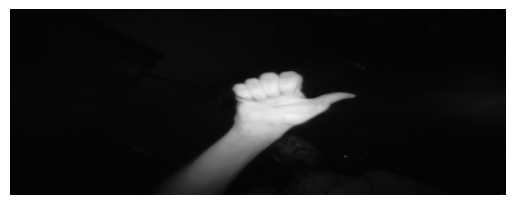

In [17]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
image_path = r"C:\Users\Devisri Mahalakshmi\Downloads\archive (21)\leapGestRecog\leapGestRecog\03\05_thumb\frame_03_05_0192.png"
print(f'Predicted Gesture: {predict_gesture(image_path)}')
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()


In [18]:
label_to_display = "05_thumb"

In [19]:
image_paths = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        img_path = os.path.join(root, file)
        label = os.path.basename(os.path.dirname(img_path))
        if label == label_to_display:
            image_paths.append(img_path)

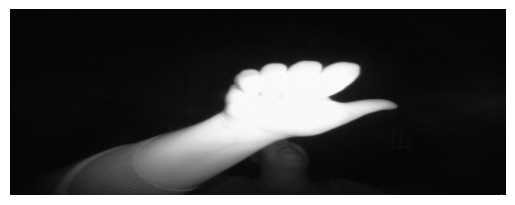

In [20]:
random_image_path = np.random.choice(image_paths)
image = cv2.imread(random_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()